<img width="550" height="650" src="https://data-flair.training/blogs/wp-content/uploads/sites/2/2018/07/Data-Preprocessing-in-Python-Machine-Learning-01.jpg" />

La limpieza y preparación de datos es el primer paso más crítico en cualquier proyecto de Inteligencia Artificial y Machine Learning. Es normal que se dedique la mayor parte del tiempo, hasta un 70%, en la limpieza de los datos.

<img width="550" height="650" src="https://cdn.dribbble.com/users/355776/screenshots/4215452/data_cleaning_with_pandas_2x.png" />

**La limpieza de datos es el proceso de detectar y corregir o eliminar registros corruptos o inexactos de un conjunto de registros, tabla o base de datos y se refiere a la identificación de partes incompletas, incorrectas, inexactas o irrelevantes de los datos, para su posterior sustitución, modificación o eliminación de los datos sucios o poco precisos**

## Paso 1. Cargar el conjunto de datos

<br>**Importación de las librerías**</br>

Lo primero que debes hacer es importar las librerías para el preprocesamiento de datos. Hay muchas librerías disponibles, pero las más populares e importantes para trabajar con datos son NumPy, Matplotlib y Pandas.

In [1]:
#Libreria numpy
import numpy as np
# libreria matplotlib
import matplotlib.pyplot as plt
#libreria pandas
import pandas as pd
#import seaborn as sns
import seaborn as sns

## Cargar los datos en Pandas

> Sobre archivo **bank**

<br> El conjunto de datos le brinda información sobre una campaña de marketing de una institución financiera en la que tendrá que analizar para encontrar formas de buscar estrategias futuras para mejorar futuras campañas de marketing para el banco.</br>
https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [9]:
data= pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [10]:
data.shape

(11162, 17)

In [11]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [12]:
#Cambiar el tipo de la variables dependiente (y) yes=1 y no=0
data["deposit"] = (data["deposit"]=="yes").astype(int)

In [13]:
#Conteo de los valores unicos de la variable dependiente
data["deposit"].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [15]:
data["education"].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [16]:
#Obtener la media de cada una de las variables según los tipos de clientes 
data.groupby("deposit").mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
0,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [17]:
#Obtener la media de cada una de las variables según la educación 
data.groupby("education").mean()


,age,balance,day,duration,campaign,pdays,previous,deposit
education,,,,,,,,
primary,48.220667,1523.031333,15.510667,383.803333,2.646000,39.976667,0.688000,0.394000
secondary,40.086012,1296.480278,15.568846,373.344960,2.470051,53.302045,0.821768,0.447407
tertiary,39.513147,1845.869070,15.782597,368.627812,2.487395,53.120629,0.924370,0.541068
unknown,45.523139,1746.605634,16.160966,346.448692,2.672032,50.585513,0.706237,0.507042


Text(0, 0.5, 'Frecuencia de compra del producto')

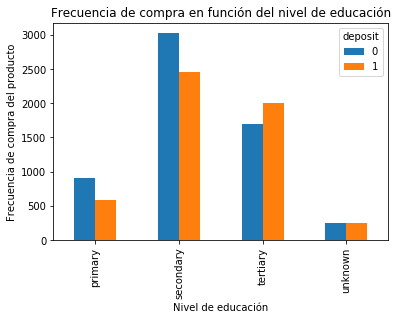

In [18]:
#La siguiente instrucción permite incorporar las gráficas en este documento 
#(sin que se abra una nueva ventana para cada gráfica)
%matplotlib inline
pd.crosstab(data.education, data.deposit).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

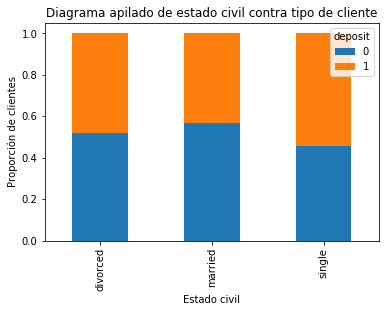

In [19]:
#Diagrama apilado de estado civil contra tipo de cliente
#axis=0 filas 
#stacked=apilado
table=pd.crosstab(data.marital, data.deposit)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra tipo de cliente")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

In [18]:
#Proporciones
table=pd.crosstab(data.marital, data.deposit).apply(lambda r: r/r.sum(), axis=0)
table

deposit,0,1
marital,,
divorced,0.114252,0.117603
married,0.612294,0.520892
single,0.273455,0.361505


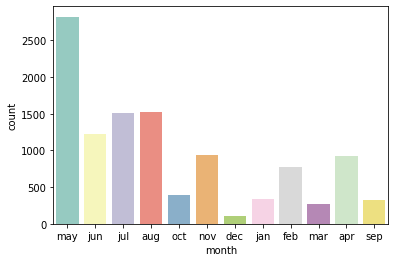

In [21]:
#Mes donde se hace el mayor número de compras
sns.countplot(data['month'],label="Sum",palette="Set3")
plt.show()

In [1]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

NameError: name 'data' is not defined

### Missing Data

In [24]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
deposit,0,0.0
loan,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0


## Conversión de las variables categóricas a dummies

In [33]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [37]:
cate = ["job", "marital", "education", "default","contact","housing", "loan",
              "month", "poutcome"]
for categoria in cate:
    cat_list = "cat"+ "_"+categoria
    cat_dummies = pd.get_dummies(data[categoria], prefix=categoria)
    data_new = data.join(cat_dummies)
    data = data_new 

In [38]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [39]:
#Listas de variables con dummies incluídas
data_var = data.columns.values.tolist()
data_var

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [40]:
#Guardar solo las dummies sin las columnas originales
to_keep = [i for i in data_var if i not in cate]
to_keep = [i for i in to_keep if i not in ["default"]]

In [41]:
#Guardar la data solo con las dummies
promo_data = data[to_keep]
promo_data.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'], dtype=object)